In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns



import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv')

In [3]:
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


##### Data Directory
Date - The date of observation

Location -The common name of the location of the weather station

MinTemp -The minimum temperature in degrees celsius

MaxTemp -The maximum temperature in degrees celsius

Rainfall -The amount of rainfall recorded for the day in mm

Evaporation -The so-called Class A pan evaporation (mm) in the 24 hours to 9am

Sunshine -The number of hours of bright sunshine in the day.

WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight

WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight

WindDir9am -Direction of the wind at 9am

WindDir3pm -Direction of the wind at 3pm

WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am

WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm

Humidity9am -Humidity (percent) at 9am

Humidity3pm -Humidity (percent) at 3pm

Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am

Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm

Cloud9am - Fraction of sky obscured by cloud at 9am.

Cloud3pm -Fraction of sky obscured by cloud

Temp9am-Temperature (degrees C) at 9am

Temp3pm -Temperature (degrees C) at 3pm

RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0

RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".

In [4]:
data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [5]:
data.shape

(8425, 23)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [7]:
data.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [8]:
elements = data.select_dtypes(include=['object']).columns

print(elements)

for i in elements:
    data[i] = data[i].fillna(data[i].mode()[0])

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')


In [9]:
cont = data.select_dtypes(include=['float']).columns

print(cont)

for i in cont:
    data[i] = data[i].fillna(data[i].mean())

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')


In [10]:
data.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [11]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,5.389395,7.632205,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,5.389395,7.632205,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,5.389395,7.632205,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,5.389395,7.632205,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,5.389395,7.632205,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,No,No


In [12]:
# Extract the Day and Month from Date column.

data['Day']= data['Date'].str.split('-').str[2]
data['Month']= data['Date'].str.split('-').str[1]
data['Year'] = data['Date'].str.split('-').str[0]

data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,2008-12-01,Albury,13.4,22.9,0.6,5.389395,7.632205,W,44.0,W,...,1007.1,8.000000,4.503183,16.9,21.8,No,No,01,12,2008
1,2008-12-02,Albury,7.4,25.1,0.0,5.389395,7.632205,WNW,44.0,NNW,...,1007.8,4.566622,4.503183,17.2,24.3,No,No,02,12,2008
2,2008-12-03,Albury,12.9,25.7,0.0,5.389395,7.632205,WSW,46.0,W,...,1008.7,4.566622,2.000000,21.0,23.2,No,No,03,12,2008
3,2008-12-04,Albury,9.2,28.0,0.0,5.389395,7.632205,NE,24.0,SE,...,1012.8,4.566622,4.503183,18.1,26.5,No,No,04,12,2008
4,2008-12-05,Albury,17.5,32.3,1.0,5.389395,7.632205,W,41.0,ENE,...,1006.0,7.000000,8.000000,17.8,29.7,No,No,05,12,2008


In [13]:
data['Month'].unique()

array(['12', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10',
       '11'], dtype=object)

In [14]:
data['Year'].unique()

array(['2008', '2009', '2010', '2011', '2013', '2014', '2015', '2016',
       '2017', '2012'], dtype=object)

In [15]:
data['Day'].unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '30', '31'], dtype=object)

In [16]:
#Converting the datatype for newly created features

data['Day'] = data['Day'].astype(int)
data['Month'] = data['Month'].astype(int)
data['Year'] = data['Year'].astype(int)

In [17]:
data['Location'].unique()

array(['Albury', 'CoffsHarbour', 'Newcastle', 'Penrith', 'Williamtown',
       'Wollongong', 'Melbourne', 'Brisbane', 'Adelaide', 'PerthAirport',
       'Darwin', 'Uluru'], dtype=object)

Location
Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: count, dtype: int64


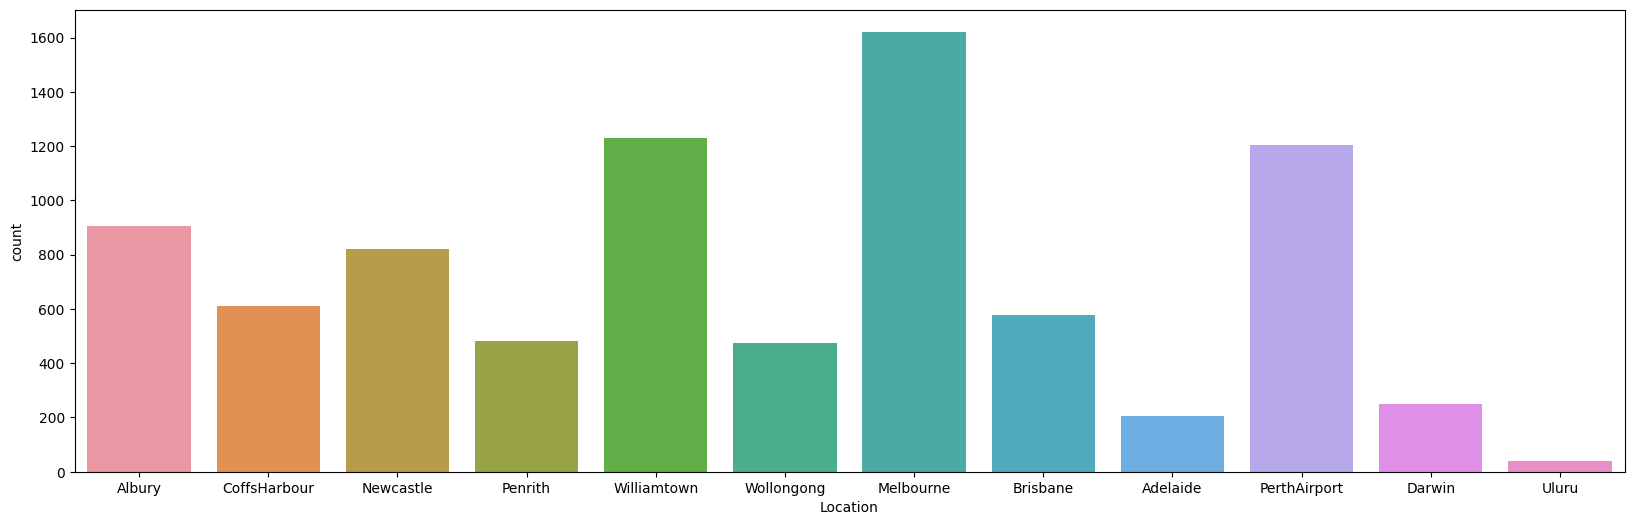

In [18]:
plt.figure(figsize=(20,6))
sns.countplot(x = data['Location'])
print(data['Location'].value_counts())

In [19]:
data['WindGustDir'].unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', 'ENE', 'SSE',
       'S', 'NW', 'SE', 'ESE', 'E', 'SSW'], dtype=object)

WindGustDir
N      1704
SSE     578
S       577
SW      572
E       557
WNW     531
W       507
WSW     504
SE      484
ENE     415
SSW     396
NW      383
NE      353
NNE     343
ESE     302
NNW     219
Name: count, dtype: int64


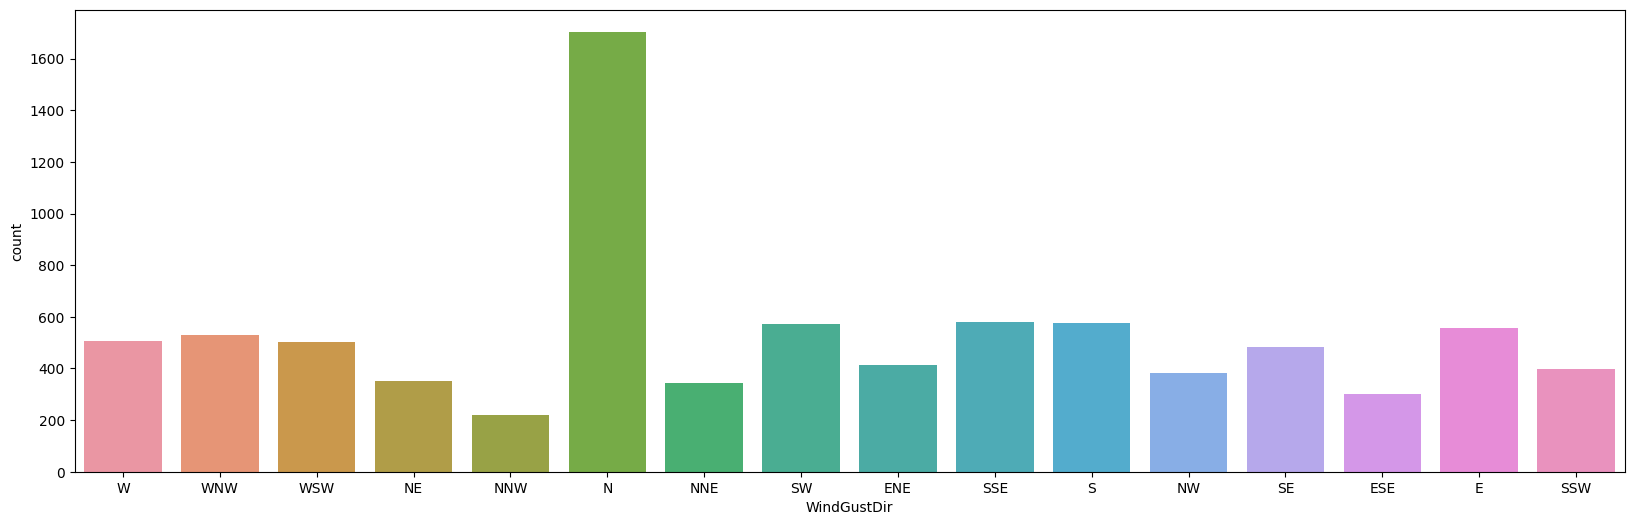

In [20]:
plt.figure(figsize=(20,6))
sns.countplot(x = data['WindGustDir'])
print(data['WindGustDir'].value_counts())

WindDir9am
N      1735
SW      704
NW      625
WSW     543
SE      505
WNW     480
SSW     467
ENE     433
NNE     430
W       414
NE      409
S       402
E       380
SSE     365
NNW     280
ESE     253
Name: count, dtype: int64


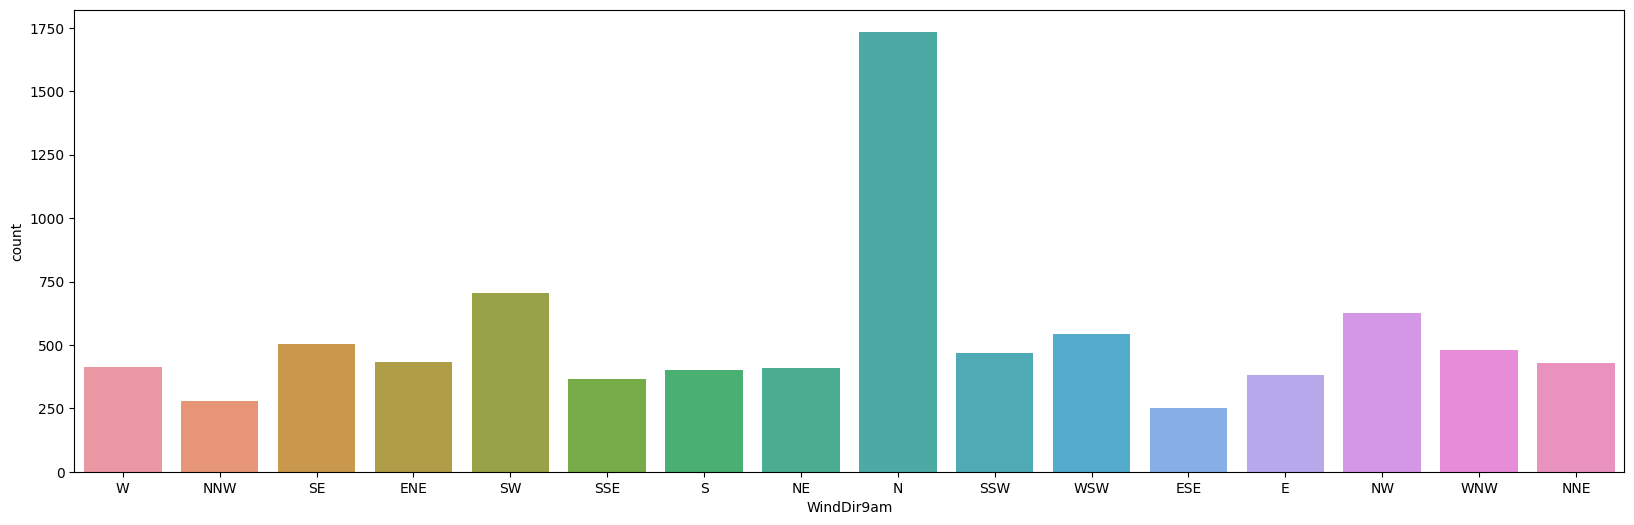

In [21]:
plt.figure(figsize=(20,6))
sns.countplot(x = data['WindDir9am'])
print(data['WindDir9am'].value_counts())

WindDir3pm
SE     1121
S       742
SSE     623
WSW     580
NE      544
N       524
SW      494
WNW     487
NW      468
W       462
ESE     462
E       460
ENE     417
SSW     370
NNE     365
NNW     306
Name: count, dtype: int64


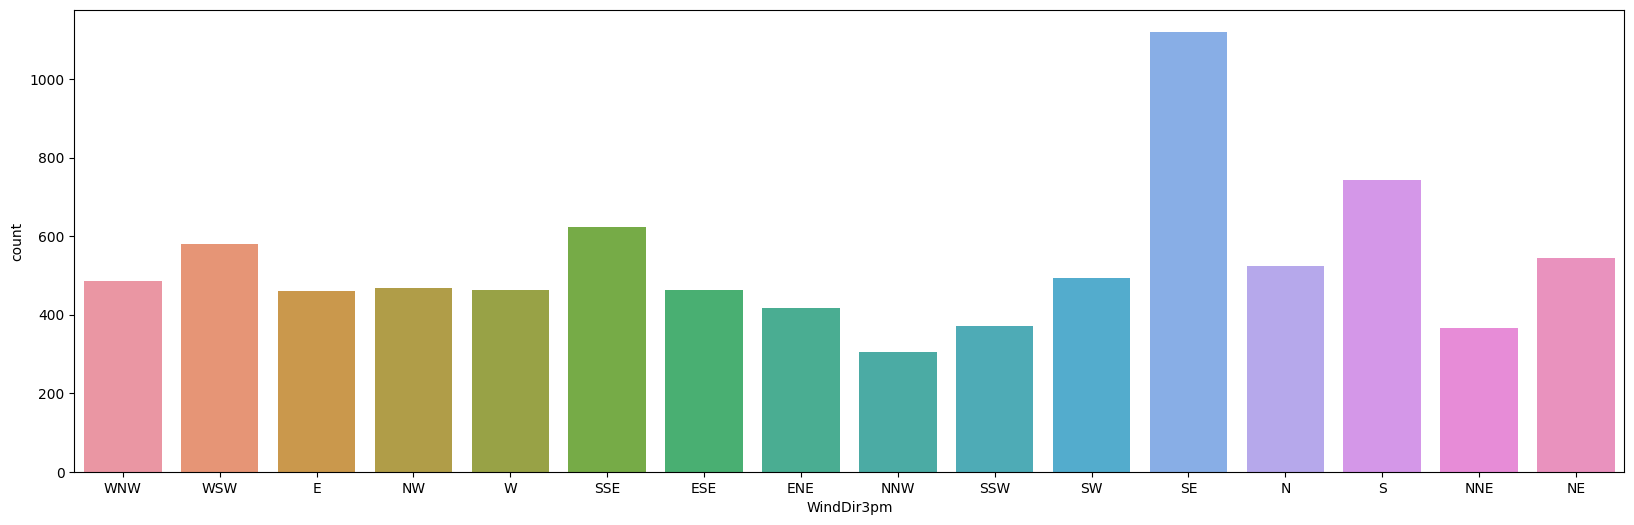

In [22]:
plt.figure(figsize=(20,6))
sns.countplot(x = data['WindDir3pm'])
print(data['WindDir3pm'].value_counts())

We can see the difference between wind Direction at 9am and 3pm. At 9am Major wind direction was from N, whereas at 3PM it was from SE.

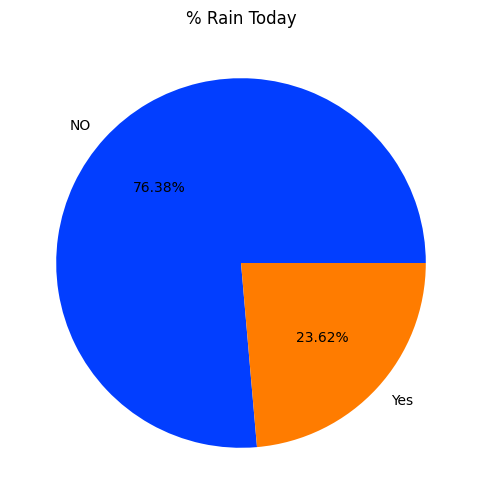

In [23]:
plt.figure(figsize=(10,6))

# define Seaborn color palette to use
palette_color = sns.color_palette('bright')
  
# plotting data on chart
plt.pie(data['RainToday'].value_counts()*100.0 /len(data),
        labels=['NO', 'Yes'],
        colors=palette_color,
        autopct='%.2f%%')
  
# displaying chart
plt.title('% Rain Today')
plt.show()

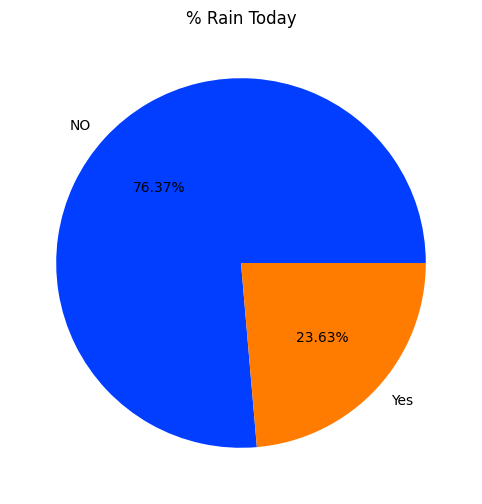

In [24]:
plt.figure(figsize=(10,6))

# define Seaborn color palette to use
palette_color = sns.color_palette('bright')
  
# plotting data on chart
plt.pie(data['RainTomorrow'].value_counts()*100.0 /len(data),
        labels=['NO', 'Yes'],
        colors=palette_color,
        autopct='%.2f%%')
  
# displaying chart
plt.title('% Rain Today')
plt.show()

<Axes: xlabel='MinTemp', ylabel='Density'>

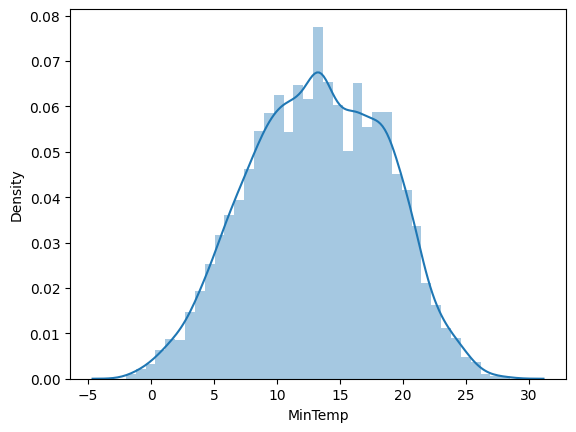

In [25]:
sns.distplot(data['MinTemp'])

Min Temp curve looks like a perfect normal curve with most of the values lies in the range of 10 to 20.

<Axes: xlabel='MaxTemp', ylabel='Density'>

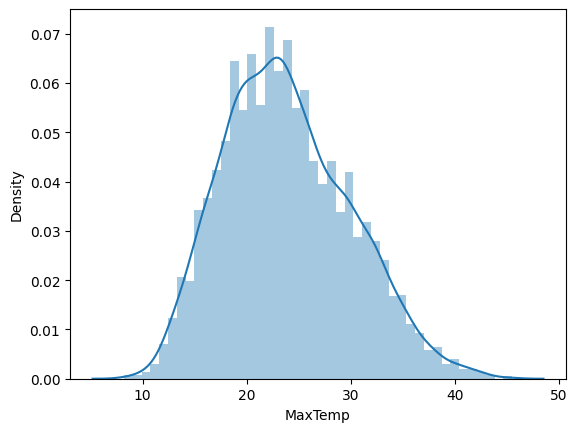

In [26]:
sns.distplot(data['MaxTemp'])

Max Temp curve also looks like a perfect normal curve with most of the values lies in the range of 20 to 30.

<Axes: xlabel='Rainfall', ylabel='Density'>

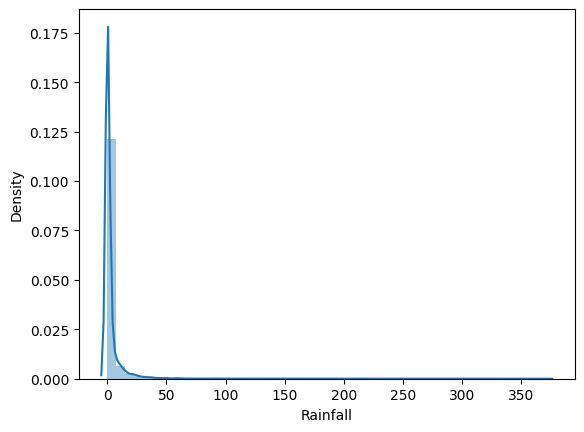

In [27]:
sns.distplot(data['Rainfall'])

It seems like majority of the values lies near to zero. Which seems like there is skewness in the data.

<Axes: xlabel='Evaporation', ylabel='Density'>

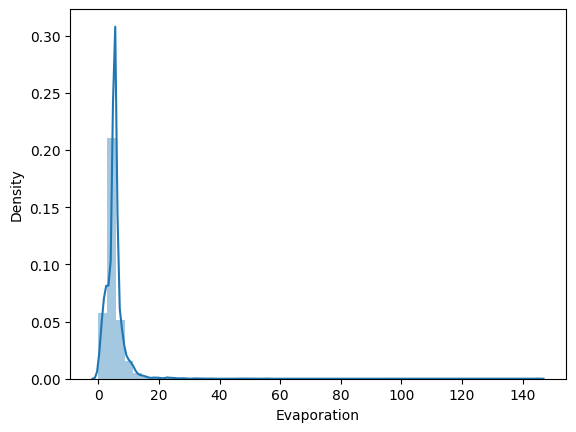

In [28]:
sns.distplot(data['Evaporation'])

Majority of the values lies near to zero. Which seems like there is skewness in the data.

<Axes: xlabel='Sunshine', ylabel='Density'>

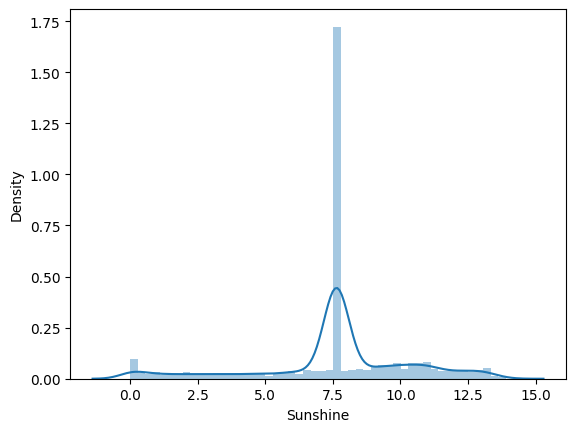

In [29]:
sns.distplot(data['Sunshine'])

<Axes: xlabel='WindGustSpeed', ylabel='Density'>

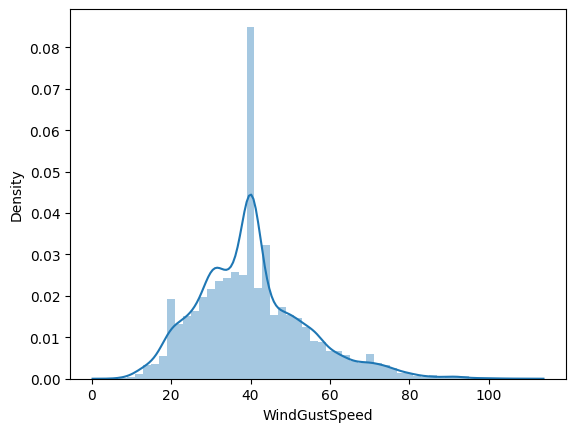

In [30]:
sns.distplot(data['WindGustSpeed'])

<Axes: xlabel='WindSpeed9am', ylabel='Density'>

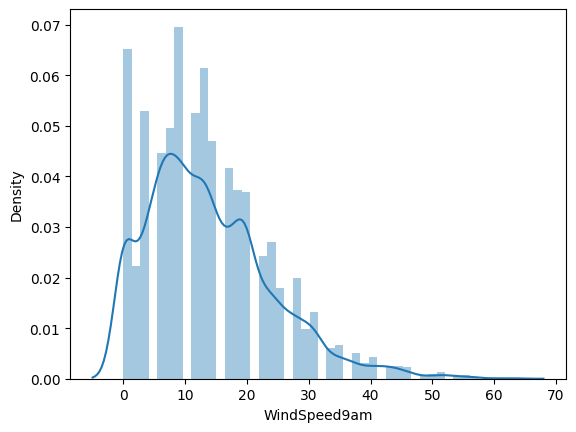

In [31]:
sns.distplot(data['WindSpeed9am'])

<Axes: xlabel='WindSpeed3pm', ylabel='Density'>

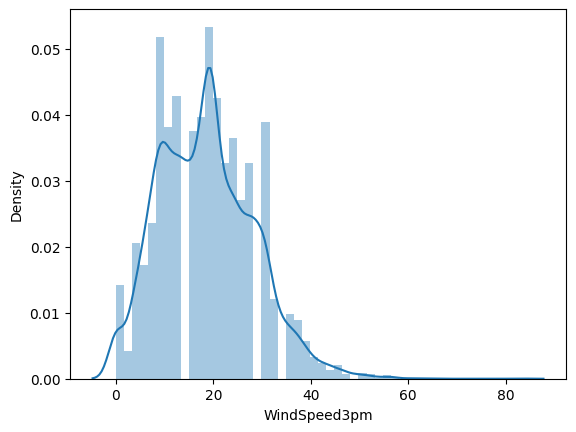

In [32]:
sns.distplot(data['WindSpeed3pm'])

Both WindSpeed 9am and 3pm has the same trend. We will create a new Column for Avg Windspeed by concating the two columns.

<Axes: xlabel='Humidity9am', ylabel='Density'>

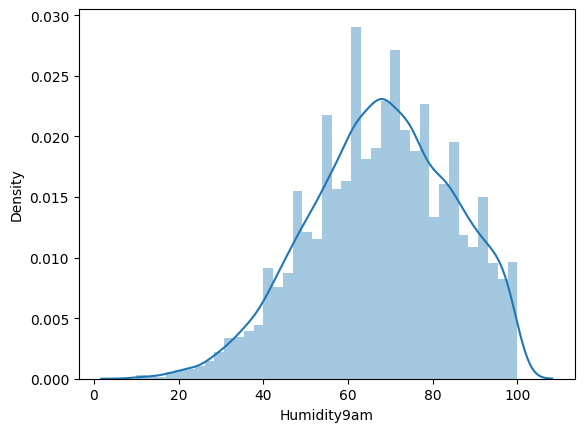

In [33]:
sns.distplot(data['Humidity9am'])

<Axes: xlabel='Humidity3pm', ylabel='Density'>

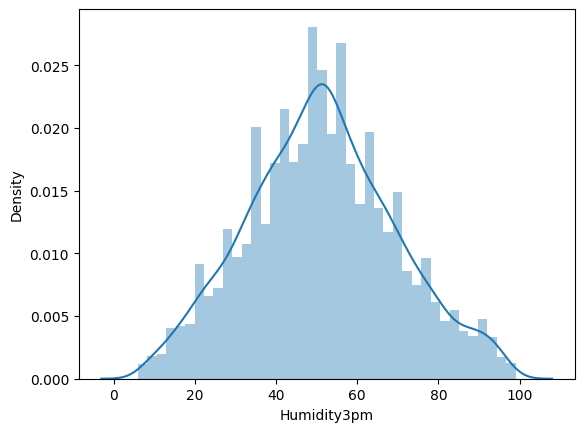

In [34]:
sns.distplot(data['Humidity3pm'])

Both Humidity 9am and 3pm has the same trend. We will create a new Column for Avg Humidity by concating the two columns.

<Axes: xlabel='Pressure9am', ylabel='Density'>

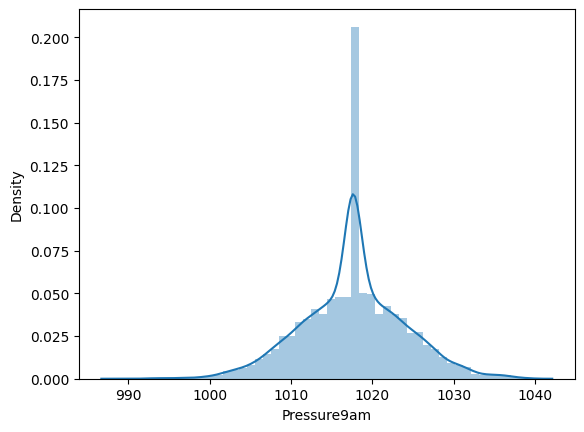

In [35]:
sns.distplot(data['Pressure9am'])

<Axes: xlabel='Pressure3pm', ylabel='Density'>

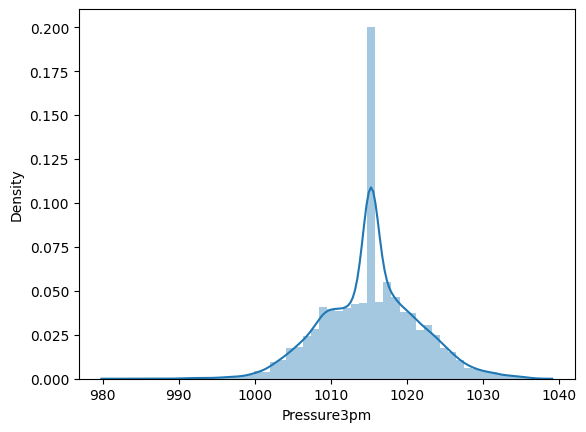

In [36]:
sns.distplot(data['Pressure3pm'])

Both Pressure 9am and 3pm has the same trend. We will create a new Column for Avg Pressure by concating the two columns.

<Axes: xlabel='Cloud9am', ylabel='Density'>

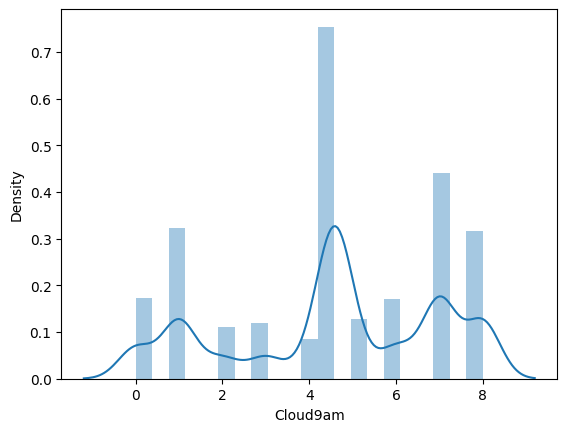

In [37]:
sns.distplot(data['Cloud9am'])

<Axes: xlabel='Cloud3pm', ylabel='Density'>

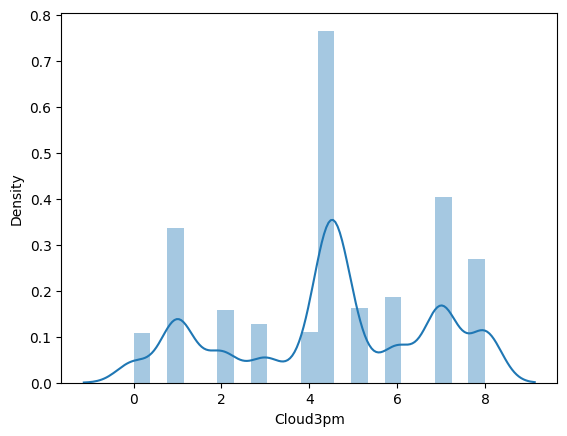

In [38]:
sns.distplot(data['Cloud3pm'])

Both Cloud 9am and 3pm has the same trend. We will create a new Column for Avg Cloud by concating the two columns.

<Axes: xlabel='Temp9am', ylabel='Density'>

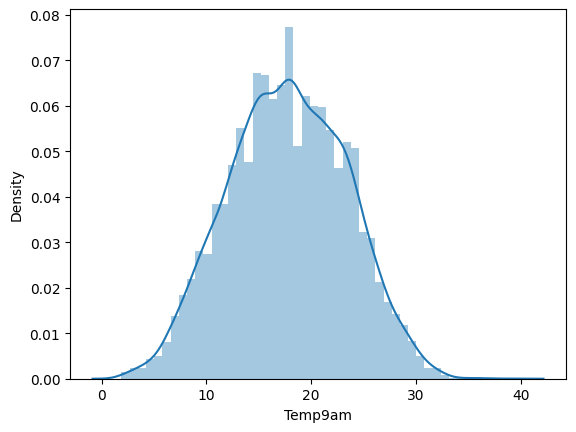

In [39]:
sns.distplot(data['Temp9am'])

<Axes: xlabel='Temp3pm', ylabel='Density'>

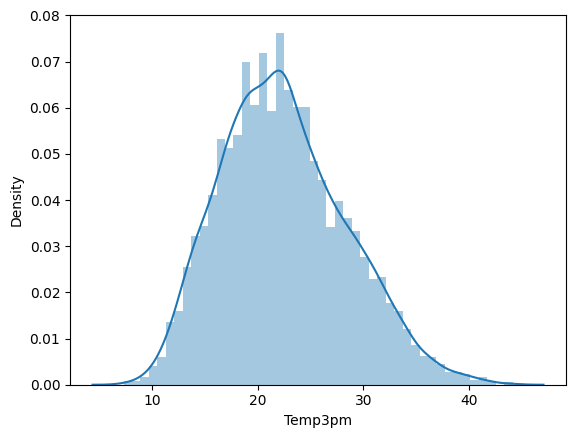

In [40]:
sns.distplot(data['Temp3pm'])

Both Temp 9am and 3pm has the same trend. We will create a new Column for Avg Temp by concating the two columns.

In [41]:
data['Avg_WindSpeed']=(data['WindSpeed9am']+data['WindSpeed3pm'])/2

data['Avg_Humidity']=(data['Humidity9am']+data['Humidity3pm'])/2

data['Avg_Cloud']=(data['Cloud9am']+data['Cloud3pm'])/2

data['Avg_Temp'] = (data['Temp9am']+data['Temp3pm'])/2

data['Avg_Pressure']=(data['Pressure9am']+data['Pressure3pm'])/2

In [42]:
data = data.drop(columns = ['Date', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Pressure9am', 'Pressure3pm'], axis=1)

data.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,RainToday,RainTomorrow,Day,Month,Year,Avg_WindSpeed,Avg_Humidity,Avg_Cloud,Avg_Temp,Avg_Pressure
0,Albury,13.4,22.9,0.6,5.389395,7.632205,W,44.0,W,WNW,No,No,1,12,2008,22.0,46.5,6.251591,19.35,1007.40
1,Albury,7.4,25.1,0.0,5.389395,7.632205,WNW,44.0,NNW,WSW,No,No,2,12,2008,13.0,34.5,4.534902,20.75,1009.20
2,Albury,12.9,25.7,0.0,5.389395,7.632205,WSW,46.0,W,WSW,No,No,3,12,2008,22.5,34.0,3.283311,22.10,1008.15
3,Albury,9.2,28.0,0.0,5.389395,7.632205,NE,24.0,SE,E,No,No,4,12,2008,10.0,30.5,4.534902,22.30,1015.20
4,Albury,17.5,32.3,1.0,5.389395,7.632205,W,41.0,ENE,NW,No,No,5,12,2008,13.5,57.5,7.500000,23.75,1008.40


<Axes: xlabel='Avg_WindSpeed', ylabel='Density'>

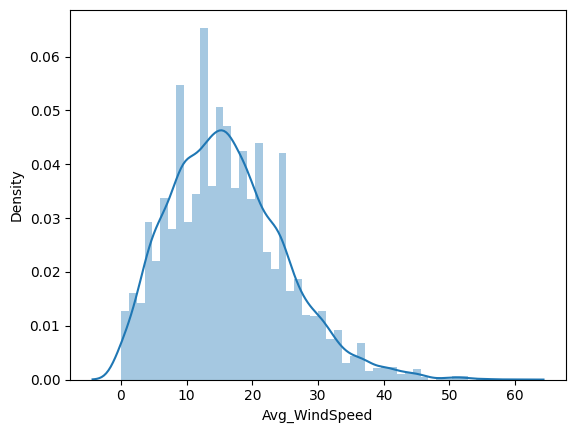

In [43]:
sns.distplot(data['Avg_WindSpeed'])

<Axes: xlabel='Avg_Cloud', ylabel='Density'>

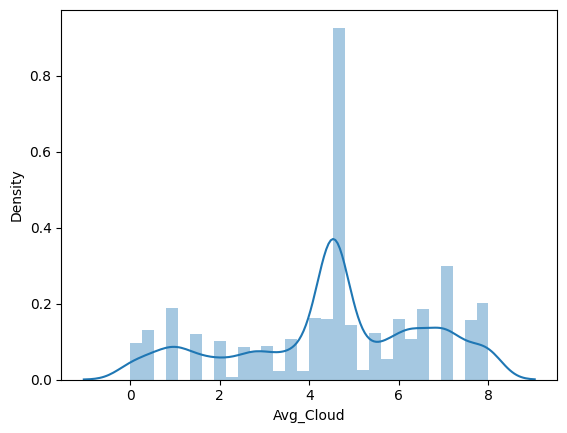

In [44]:
sns.distplot(data['Avg_Cloud'])

<Axes: xlabel='Avg_Humidity', ylabel='Density'>

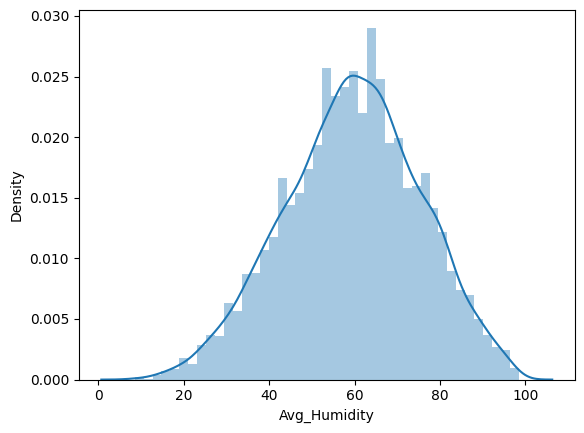

In [45]:
sns.distplot(data['Avg_Humidity'])

<Axes: xlabel='Avg_Pressure', ylabel='Density'>

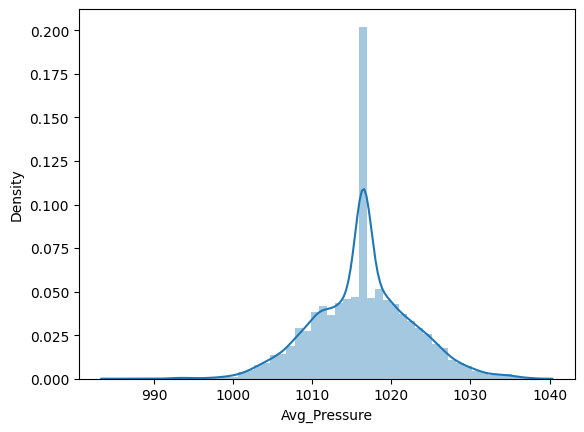

In [46]:
sns.distplot(data['Avg_Pressure'])

<Axes: xlabel='Avg_Temp', ylabel='Density'>

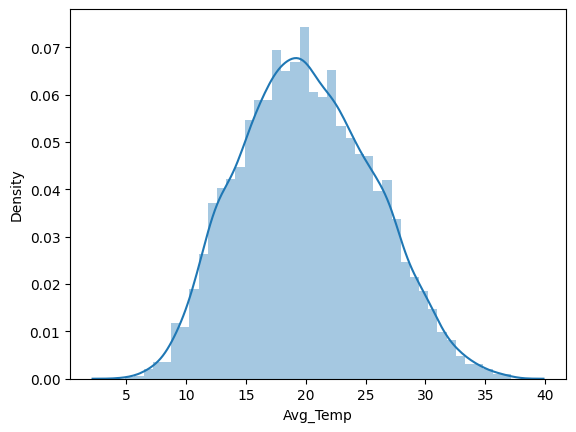

In [47]:
sns.distplot(data['Avg_Temp'])

<Axes: xlabel='RainToday', ylabel='Avg_Temp'>

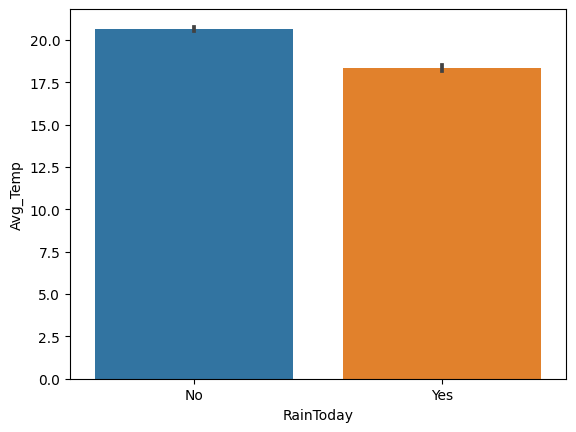

In [48]:
sns.barplot(y='Avg_Temp', x='RainToday', data = data)

<Axes: xlabel='RainToday', ylabel='Avg_Pressure'>

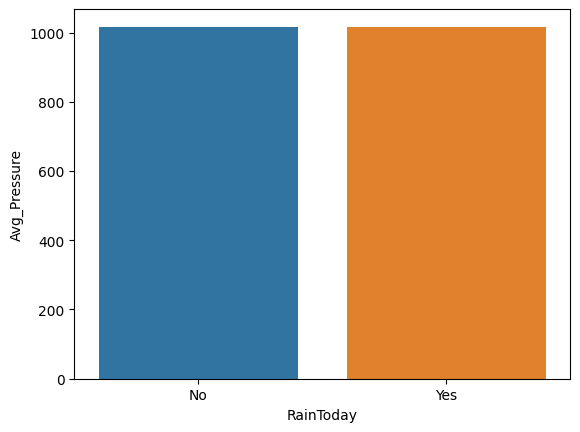

In [49]:
sns.barplot(y='Avg_Pressure', x='RainToday', data = data)

<Axes: xlabel='RainToday', ylabel='Avg_Cloud'>

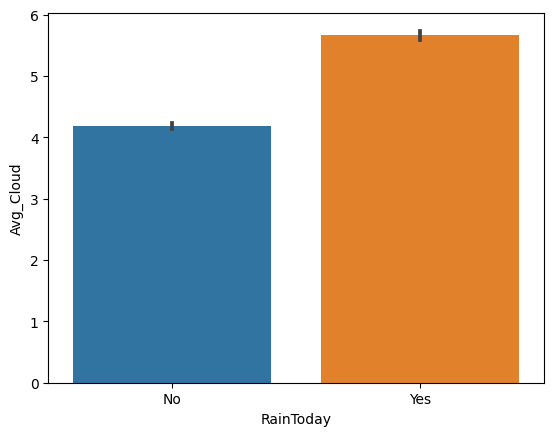

In [50]:
sns.barplot(y='Avg_Cloud', x='RainToday', data = data)

<Axes: xlabel='RainToday', ylabel='Avg_Humidity'>

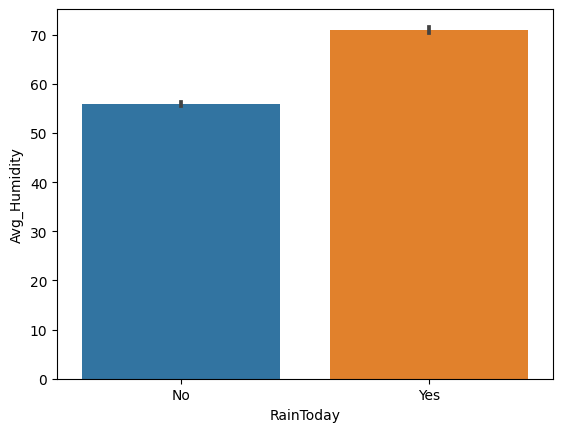

In [51]:
sns.barplot(y='Avg_Humidity', x='RainToday', data = data)

<Axes: xlabel='RainToday', ylabel='Avg_WindSpeed'>

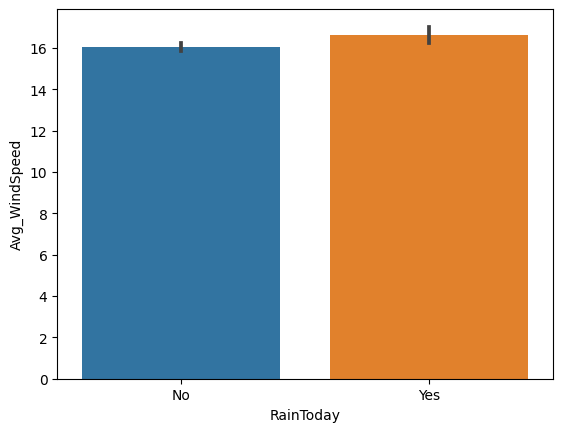

In [52]:
sns.barplot(y='Avg_WindSpeed', x='RainToday', data = data)

# Data Encoding

In [53]:
# Encoding Dataset

from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()

catg = data.select_dtypes(include=['object']).columns

catg

Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday',
       'RainTomorrow'],
      dtype='object')

In [54]:
for i in catg:
    data[i] = enc.fit_transform(data[i])

In [55]:
data.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,RainToday,RainTomorrow,Day,Month,Year,Avg_WindSpeed,Avg_Humidity,Avg_Cloud,Avg_Temp,Avg_Pressure
0,1,13.4,22.9,0.6,5.389395,7.632205,13,44.0,13,14,0,0,1,12,2008,22.0,46.5,6.251591,19.35,1007.40
1,1,7.4,25.1,0.0,5.389395,7.632205,14,44.0,6,15,0,0,2,12,2008,13.0,34.5,4.534902,20.75,1009.20
2,1,12.9,25.7,0.0,5.389395,7.632205,15,46.0,13,15,0,0,3,12,2008,22.5,34.0,3.283311,22.10,1008.15
3,1,9.2,28.0,0.0,5.389395,7.632205,4,24.0,9,0,0,0,4,12,2008,10.0,30.5,4.534902,22.30,1015.20
4,1,17.5,32.3,1.0,5.389395,7.632205,13,41.0,1,7,0,0,5,12,2008,13.5,57.5,7.500000,23.75,1008.40


In [56]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Location,8425.0,5.793591,3.162654,0.00,3.000000,6.000000,8.000000,11.00
MinTemp,8425.0,13.193305,5.379488,-2.00,9.300000,13.200000,17.300000,28.50
MaxTemp,8425.0,23.859976,6.114516,8.20,19.300000,23.300000,28.000000,45.50
Rainfall,8425.0,2.805913,10.309308,0.00,0.000000,0.000000,1.400000,371.00
Evaporation,8425.0,5.389395,3.852004,0.00,4.000000,5.389395,5.389395,145.00
Sunshine,8425.0,7.632205,2.825451,0.00,7.632205,7.632205,8.900000,13.90
WindGustDir,8425.0,7.217804,4.702616,0.00,3.000000,7.000000,12.000000,15.00
WindGustSpeed,8425.0,40.174469,13.776101,7.00,31.000000,40.174469,48.000000,107.00
WindDir9am,8425.0,7.267418,4.588045,0.00,3.000000,7.000000,12.000000,15.00
WindDir3pm,8425.0,7.810445,4.430162,0.00,4.000000,8.000000,11.000000,15.00


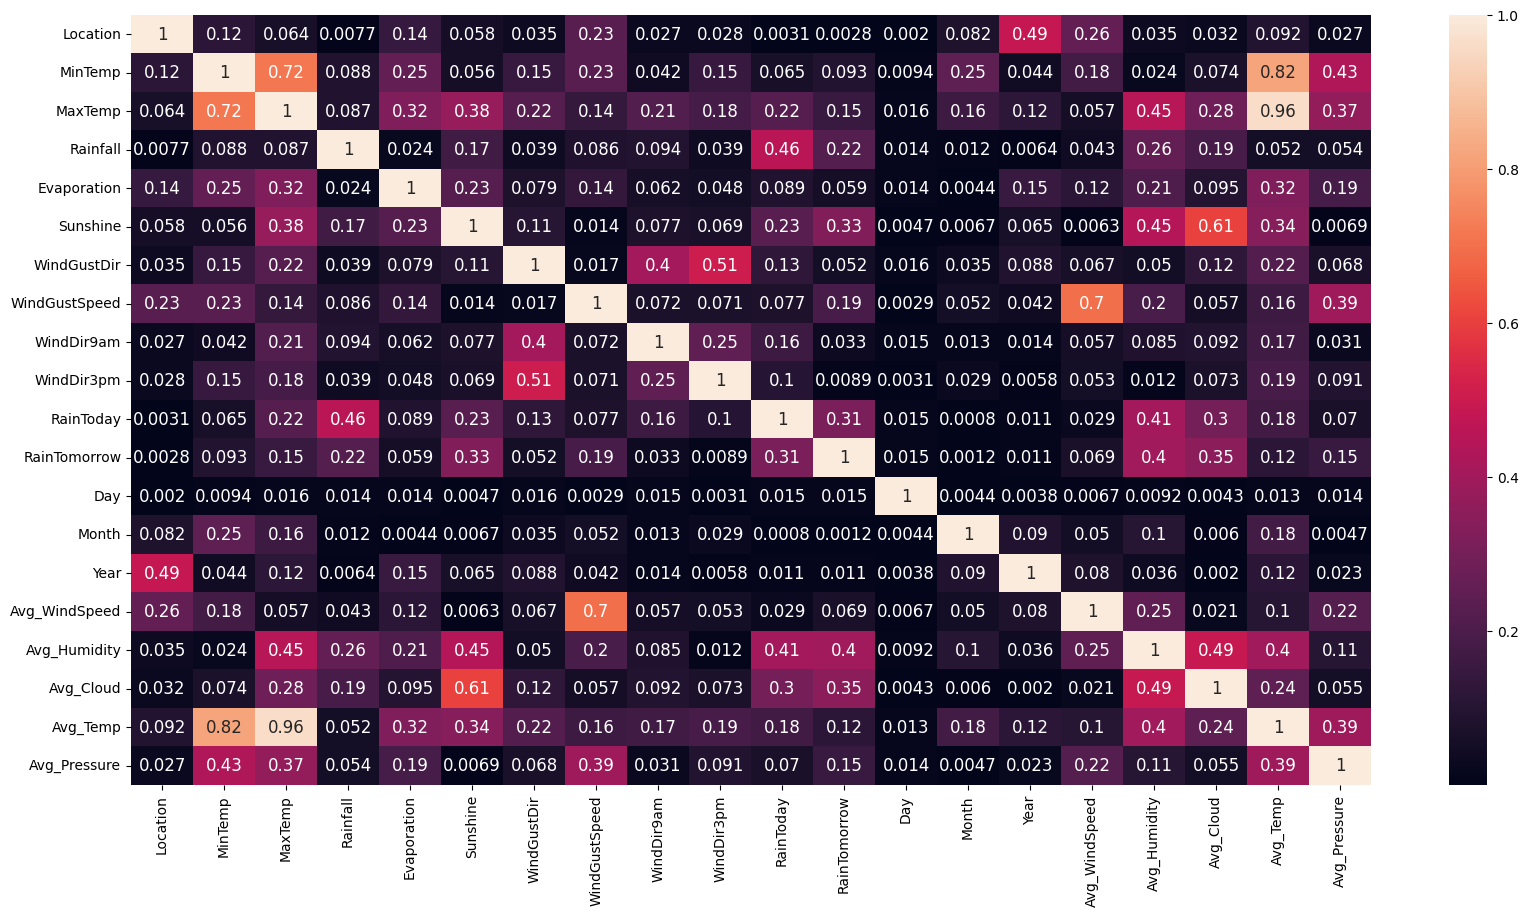

In [57]:
data_corr = data.corr().abs()

plt.figure(figsize = (20,10))
sns.heatmap(data_corr, annot = True, annot_kws={'size':12})
plt.show()

The highest value for correlation matrix is 0.96 between Avg_Temp and Max_Temp, which shows a strong correlation between the two columns. Apart from that there is no such column with high correlation value. We will also check for multicollinearity using VIF.

### Checking Skewness and Outliers

In [58]:
x = data.drop(['RainTomorrow'], axis=1)
y = data['RainTomorrow']

In [59]:
print(x.shape)
print(y.shape)

(8425, 19)
(8425,)


In [60]:
x.skew().sort_values(ascending = False)

Evaporation      14.023948
Rainfall         13.218403
RainToday         1.242362
WindGustSpeed     0.757000
Avg_WindSpeed     0.644306
Year              0.418663
MaxTemp           0.380654
WindDir9am        0.172792
Avg_Temp          0.170653
WindGustDir       0.119640
Month             0.039388
Avg_Pressure      0.005032
Day               0.004260
Location         -0.050456
MinTemp          -0.089989
WindDir3pm       -0.119847
Avg_Humidity     -0.151055
Avg_Cloud        -0.374727
Sunshine         -0.716525
dtype: float64

Keeping +/- 0.5 as the range for skewness, here are the columns which are beyond the range.

Evaporation - Continuous

Rainfall - Categorical

RainToday - Categorical

WindGustSpeed - Continuous

Avg_WindSpeed - Continuous

Sunshine - Continuous

Multiple columns are having continuous data and has skewness beyond the range. Therefore we will treat the skewness.

In [61]:
from sklearn.preprocessing import power_transform

In [62]:
!pip3 install numpy==1.23.4

In [63]:
from sklearn.preprocessing import power_transform
x_new = power_transform(x)

In [64]:
pd.DataFrame(x_new, columns = x.columns).skew().sort_values(ascending = False)

RainToday        1.242362
Rainfall         0.904387
Evaporation      0.080305
WindGustSpeed    0.010481
Avg_Pressure     0.000947
Year             0.000000
MaxTemp         -0.010591
Avg_WindSpeed   -0.023574
Avg_Temp        -0.029065
Avg_Humidity    -0.047725
Sunshine        -0.075544
MinTemp         -0.102983
WindDir9am      -0.155025
Month           -0.155749
Location        -0.186657
WindGustDir     -0.187177
Avg_Cloud       -0.192919
Day             -0.211250
WindDir3pm      -0.248689
dtype: float64

In [65]:
x = pd.DataFrame(x_new, columns = x.columns)

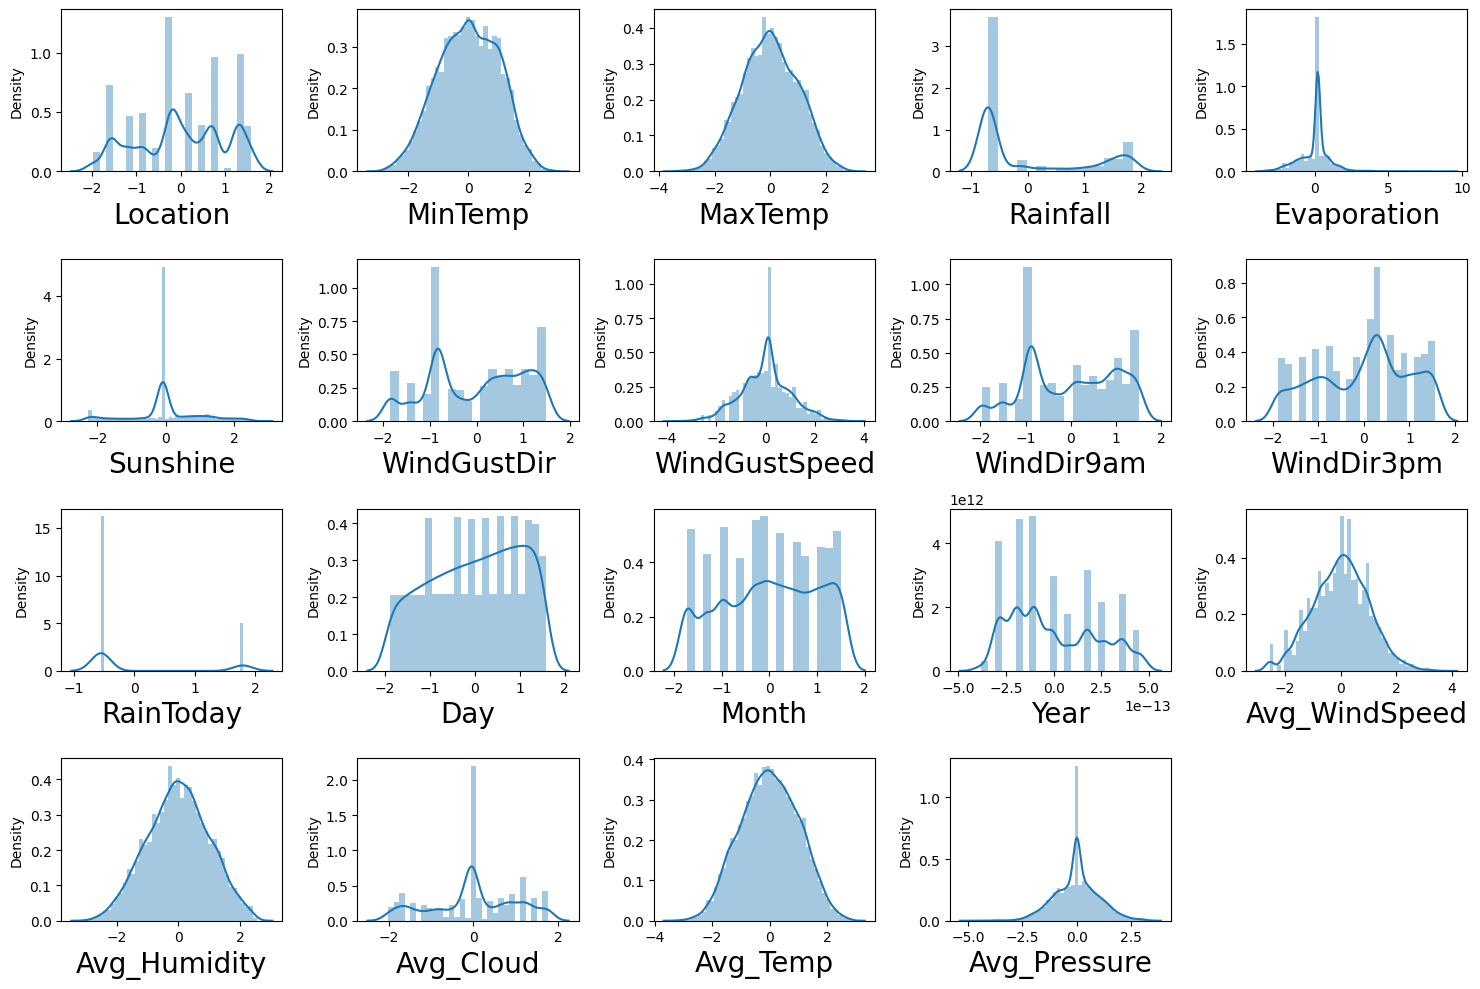

In [66]:
plt.figure(figsize = (15,10))
plotnumber = 1

for column in x:
    if plotnumber <= 20:
        ax = plt.subplot(4,5,plotnumber)
        sns.distplot(x[column])
        plt.xlabel(column, fontsize = 20)
    plotnumber +=1
plt.tight_layout()

Now the skewness is removed from the data. We can proceed ahead for Data Cleaning.

### Checking Outliers

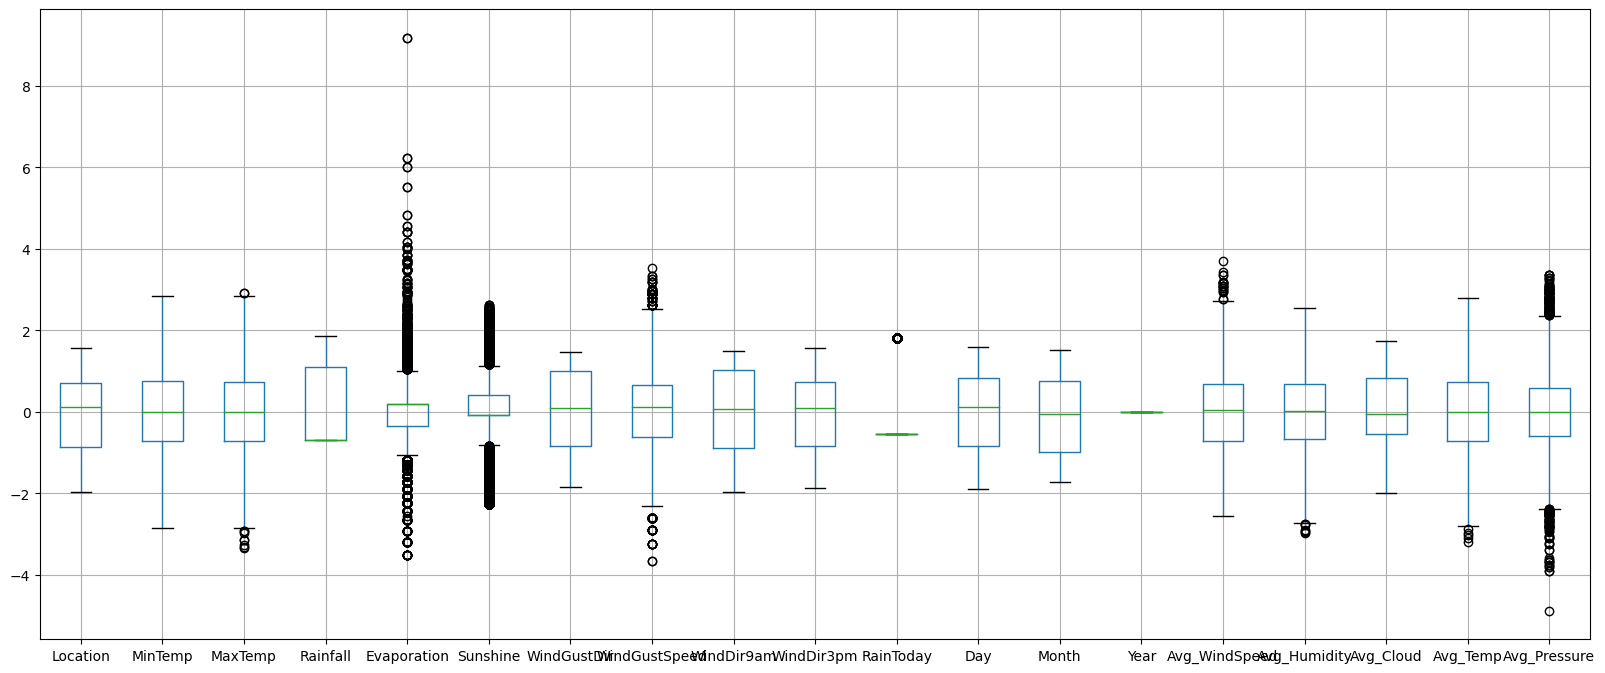

In [67]:
x.iloc[:,:].boxplot(figsize = (20,10))
plt.subplots_adjust(bottom=0.25)
plt.show()

In [68]:
from scipy.stats import zscore

print('High Side Outliers present')
print((zscore(x)<3).all())

print('****************************************')

print('Low Side Outliers Present')
print((zscore(x)>-3).all())

High Side Outliers present
Location          True
MinTemp           True
MaxTemp           True
Rainfall          True
Evaporation      False
Sunshine          True
WindGustDir       True
WindGustSpeed    False
WindDir9am        True
WindDir3pm        True
RainToday         True
Day               True
Month             True
Year              True
Avg_WindSpeed    False
Avg_Humidity      True
Avg_Cloud         True
Avg_Temp          True
Avg_Pressure     False
dtype: bool
****************************************
Low Side Outliers Present
Location          True
MinTemp           True
MaxTemp          False
Rainfall          True
Evaporation      False
Sunshine          True
WindGustDir       True
WindGustSpeed    False
WindDir9am        True
WindDir3pm        True
RainToday         True
Day               True
Month             True
Year              True
Avg_WindSpeed     True
Avg_Humidity      True
Avg_Cloud         True
Avg_Temp         False
Avg_Pressure     False
dtype: bool


Features having outliers in High Side are: 1. Evaporation, 2.WindGustSpeed, 3. Avg_WindSpeed, 4. Avg_Pressure

Features having outliers in Low side are: 1.MaxTemp, 2. Evaporation, 3.WindGustSpeed, 4. Avg_Temp, 5. Avg_Pressure

In [69]:
# Validating OUtliers

#1st Quantile
q1 = x.quantile(0.25)

#3rd quantile
q3 = x.quantile(0.75)

#IQR
iqr = q3 - q1

In [70]:
Evaporation_high = q3.Evaporation + (1.5 * iqr.Evaporation)

# Check the Indexes which have higher values

index1 = np.where(x['Evaporation']> Evaporation_high)

x = x.drop(x['Evaporation'].index[index1])

y = y.drop(y.index[index1])

print(x.shape)
print(y.shape)

(7674, 19)
(7674,)


In [71]:
WindGustSpeed_high = q3.WindGustSpeed + (1.5 * iqr.WindGustSpeed)

# Check the Indexes which have higher values

index1 = np.where(x['WindGustSpeed']> WindGustSpeed_high)

x = x.drop(x['WindGustSpeed'].index[index1])

y = y.drop(y.index[index1])

print(x.shape)
print(y.shape)

(7622, 19)
(7622,)


In [72]:
Avg_WindSpeed_high = q3.Avg_WindSpeed + (1.5 * iqr.Avg_WindSpeed)

# Check the Indexes which have higher values

index1 = np.where(x['Avg_WindSpeed']>Avg_WindSpeed_high )

x = x.drop(x['Avg_WindSpeed'].index[index1])

y = y.drop(y.index[index1])

print(x.shape)
print(y.shape)

(7616, 19)
(7616,)


In [73]:
Avg_Pressure_high = q3.Avg_Pressure + (1.5 * iqr.Avg_Pressure)

# Check the Indexes which have higher values

index1 = np.where(x['Avg_Pressure']>Avg_Pressure_high )

x = x.drop(x['Avg_Pressure'].index[index1])

y = y.drop(y.index[index1])

print(x.shape)
print(y.shape)

(7509, 19)
(7509,)


In [74]:
MaxTemp_low = q1.MaxTemp - (1.5 * iqr.MaxTemp)

# Check the Indexes which have higher values

index1 = np.where(x['MaxTemp']< MaxTemp_low  )

x = x.drop(x['MaxTemp'].index[index1])

y = y.drop(y.index[index1])

print(x.shape)
print(y.shape)

(7501, 19)
(7501,)


In [75]:
Evaporation_low = q1.Evaporation- (1.5 * iqr.Evaporation)

# Check the Indexes which have higher values

index1 = np.where(x['Evaporation']< Evaporation_low )

x = x.drop(x['Evaporation'].index[index1])

y = y.drop(y.index[index1])

print(x.shape)
print(y.shape)

(6443, 19)
(6443,)


In [76]:
WindGustSpeed_low = q1.WindGustSpeed- (1.5 * iqr.WindGustSpeed)

# Check the Indexes which have higher values

index1 = np.where(x['WindGustSpeed']< WindGustSpeed_low  )

x = x.drop(x['WindGustSpeed'].index[index1])

y = y.drop(y.index[index1])

print(x.shape)
print(y.shape)

(6362, 19)
(6362,)


In [77]:
Avg_Temp_low = q1.Avg_Temp- (1.5 * iqr.Avg_Temp)

# Check the Indexes which have higher values

index1 = np.where(x['Avg_Temp']< Avg_Temp_low  )

x = x.drop(x['Avg_Temp'].index[index1])

y = y.drop(y.index[index1])

print(x.shape)
print(y.shape)

(6361, 19)
(6361,)


In [78]:
Avg_Pressure_low = q1. Avg_Pressure- (1.5 * iqr.Avg_Pressure)

# Check the Indexes which have higher values

index1 = np.where(x['Avg_Pressure']<  Avg_Pressure_low  )

x = x.drop(x['Avg_Pressure'].index[index1])

y = y.drop(y.index[index1])

print(x.shape)
print(y.shape)

(6300, 19)
(6300,)


In [79]:
from scipy.stats import zscore

print('High Side Outliers present')
print((zscore(x)<3).all())

print('****************************************')

print('Low Side Outliers Present')
print((zscore(x)>-3).all())

High Side Outliers present
Location          True
MinTemp           True
MaxTemp          False
Rainfall          True
Evaporation       True
Sunshine          True
WindGustDir       True
WindGustSpeed     True
WindDir9am        True
WindDir3pm        True
RainToday         True
Day               True
Month             True
Year              True
Avg_WindSpeed     True
Avg_Humidity      True
Avg_Cloud         True
Avg_Temp          True
Avg_Pressure      True
dtype: bool
****************************************
Low Side Outliers Present
Location          True
MinTemp           True
MaxTemp          False
Rainfall          True
Evaporation       True
Sunshine          True
WindGustDir       True
WindGustSpeed     True
WindDir9am        True
WindDir3pm        True
RainToday         True
Day               True
Month             True
Year              True
Avg_WindSpeed     True
Avg_Humidity     False
Avg_Cloud         True
Avg_Temp         False
Avg_Pressure      True
dtype: bool


There is still some outliers present in the dataset. We will remove them before proceeding furthur.

In [80]:
# Validating OUtliers

#1st Quantile
q1 = x.quantile(0.25)

#3rd quantile
q3 = x.quantile(0.75)

#IQR
iqr = q3 - q1

In [81]:
MaxTemp_high = q3.MaxTemp + (1.5 * iqr.MaxTemp)

# Check the Indexes which have higher values

index1 = np.where(x['MaxTemp']> MaxTemp_high)

x = x.drop(x['MaxTemp'].index[index1])

y = y.drop(y.index[index1])

print(x.shape)
print(y.shape)

(6296, 19)
(6296,)


In [82]:
MaxTemp_low = q1.MaxTemp - (1.5 * iqr.MaxTemp)

# Check the Indexes which have higher values

index1 = np.where(x['MaxTemp']< MaxTemp_low  )

x = x.drop(x['MaxTemp'].index[index1])

y = y.drop(y.index[index1])

print(x.shape)
print(y.shape)

(6278, 19)
(6278,)


In [83]:
Avg_Temp_low = q1.Avg_Temp - (1.5 * iqr.Avg_Temp)

# Check the Indexes which have higher values

index1 = np.where(x['Avg_Temp']< Avg_Temp_low)

x = x.drop(x['Avg_Temp'].index[index1])

y = y.drop(y.index[index1])

print(x.shape)
print(y.shape)

(6265, 19)
(6265,)


In [84]:
Avg_Humidity_low = q1.Avg_Humidity- (1.5 * iqr.Avg_Humidity)

# Check the Indexes which have higher values

index1 = np.where(x['Avg_Humidity']< Avg_Humidity_low )

x = x.drop(x['Avg_Humidity'].index[index1])

y = y.drop(y.index[index1])

print(x.shape)
print(y.shape)

(6260, 19)
(6260,)


In [85]:
from scipy.stats import zscore

print('High Side Outliers present')
print((zscore(x)<3).all())

print('****************************************')

print('Low Side Outliers Present')
print((zscore(x)>-3).all())

High Side Outliers present
Location          True
MinTemp           True
MaxTemp           True
Rainfall          True
Evaporation       True
Sunshine          True
WindGustDir       True
WindGustSpeed     True
WindDir9am        True
WindDir3pm        True
RainToday         True
Day               True
Month             True
Year              True
Avg_WindSpeed     True
Avg_Humidity      True
Avg_Cloud         True
Avg_Temp         False
Avg_Pressure      True
dtype: bool
****************************************
Low Side Outliers Present
Location         True
MinTemp          True
MaxTemp          True
Rainfall         True
Evaporation      True
Sunshine         True
WindGustDir      True
WindGustSpeed    True
WindDir9am       True
WindDir3pm       True
RainToday        True
Day              True
Month            True
Year             True
Avg_WindSpeed    True
Avg_Humidity     True
Avg_Cloud        True
Avg_Temp         True
Avg_Pressure     True
dtype: bool


In [86]:
Avg_Temp_high = q3.Avg_Temp + (1.5 * iqr.Avg_Temp)

# Check the Indexes which have higher values

index1 = np.where(x['Avg_Temp']> Avg_Temp_high)

x = x.drop(x['Avg_Temp'].index[index1])

y = y.drop(y.index[index1])

print(x.shape)
print(y.shape)

(6255, 19)
(6255,)


In [87]:
print('High Side Outliers present')
print((zscore(x)<3).all())

print('****************************************')

print('Low Side Outliers Present')
print((zscore(x)>-3).all())

High Side Outliers present
Location         True
MinTemp          True
MaxTemp          True
Rainfall         True
Evaporation      True
Sunshine         True
WindGustDir      True
WindGustSpeed    True
WindDir9am       True
WindDir3pm       True
RainToday        True
Day              True
Month            True
Year             True
Avg_WindSpeed    True
Avg_Humidity     True
Avg_Cloud        True
Avg_Temp         True
Avg_Pressure     True
dtype: bool
****************************************
Low Side Outliers Present
Location         True
MinTemp          True
MaxTemp          True
Rainfall         True
Evaporation      True
Sunshine         True
WindGustDir      True
WindGustSpeed    True
WindDir9am       True
WindDir3pm       True
RainToday        True
Day              True
Month            True
Year             True
Avg_WindSpeed    True
Avg_Humidity     True
Avg_Cloud        True
Avg_Temp         True
Avg_Pressure     True
dtype: bool


In [88]:
# Percentage Data Loss

Data_loss = ((8425-6255)/8425)*100

Data_loss

25.7566765578635

Now the outliers are treated. We can proceed furthur.

In [89]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_scaled = scaler.fit_transform(x)

In [90]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif['vif'] = [variance_inflation_factor(x_scaled, i) for i in range (x_scaled.shape[1])]

vif['features'] = x.columns


# Lets check the values 
vif

,vif,features
0,1.593531,Location
1,6.989521,MinTemp
2,14.633397,MaxTemp
3,5.109942,Rainfall
4,1.193588,Evaporation
5,1.642327,Sunshine
6,1.546501,WindGustDir
7,1.960328,WindGustSpeed
8,1.278026,WindDir9am
9,1.443167,WindDir3pm


As we have seen in the correlation matrix, The column Max_Temp and Avg_Temp are having strong correlation between them. Therefore we reed to remove one column in order to reduce mulitcollinearity.

In [91]:
x = x.drop(['Avg_Temp'], axis=1)

x.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,RainToday,Day,Month,Year,Avg_WindSpeed,Avg_Humidity,Avg_Cloud,Avg_Pressure
0,-1.57287,0.041124,-0.077141,0.534236,0.195503,-0.082709,1.160646,0.380260,1.179858,1.349376,-0.556099,-1.893365,1.511409,-3.785861e-13,0.720439,-0.834088,0.820975,-1.461738
1,-1.57287,-1.076281,0.280346,-0.698529,0.195503,-0.082709,1.319872,0.380260,-0.140685,1.552244,-0.556099,-1.710758,1.511409,-3.785861e-13,-0.256648,-1.554871,-0.044404,-1.170337
2,-1.57287,-0.051713,0.374368,-0.698529,0.195503,-0.082709,1.474872,0.515699,1.179858,1.552244,-0.556099,-1.544131,1.511409,-3.785861e-13,0.769440,-1.584206,-0.641697,-1.340310
3,-1.57287,-0.740202,0.722385,-0.698529,0.195503,-0.082709,-0.578373,-1.265782,0.473499,-1.874337,-0.556099,-1.388459,1.511409,-3.785861e-13,-0.639112,-1.787793,-0.044404,-0.199654
4,-1.57287,0.800894,1.327005,0.888946,0.195503,-0.082709,1.160646,0.169468,-1.528740,-0.137530,-0.556099,-1.240995,1.511409,-3.785861e-13,-0.196414,-0.149109,1.478348,-1.299837


In [92]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_scaled = scaler.fit_transform(x)

In [93]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif['vif'] = [variance_inflation_factor(x_scaled, i) for i in range (x_scaled.shape[1])]

vif['features'] = x.columns


# Lets check the values 
vif

,vif,features
0,1.591532,Location
1,3.669213,MinTemp
2,3.977359,MaxTemp
3,5.099294,Rainfall
4,1.191640,Evaporation
5,1.637798,Sunshine
6,1.545461,WindGustDir
7,1.933966,WindGustSpeed
8,1.276851,WindDir9am
9,1.441555,WindDir3pm


We can clearly observe that, the VIF values have reduced significantly. And as the max VIF value for the dataset is below 10. we are certain that there is no multicollinearity present in the dataset.

## Model Building

In [94]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.svm import SVC

In [95]:
maxAccu = 0
maxRS = 0

model = [LogisticRegression(),
         RandomForestClassifier(),
         DecisionTreeClassifier(),
         KNeighborsClassifier(),
         xgb.XGBClassifier(),
         SVC()]

for rs in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.25, random_state = rs)
    for i in model:
        i.fit(x_train, y_train)
        y_pred = i.predict(x_test)
        acc = accuracy_score(y_test,y_pred)
        print('Accuracy score', acc, 'random_state', rs, 'Model', i)
        if acc > maxAccu:
            maxAccu = acc
            maxRS = rs
            final_model = i
            
        
print('Max Accuracy score is', maxAccu, 'at random_state', rs, 'for Model:', i)

Accuracy score 0.8241687979539642 random_state 1 Model LogisticRegression()
Accuracy score 0.889386189258312 random_state 1 Model RandomForestClassifier()
Accuracy score 0.8318414322250639 random_state 1 Model DecisionTreeClassifier()
Accuracy score 0.8190537084398977 random_state 1 Model KNeighborsClassifier()
Accuracy score 0.8823529411764706 random_state 1 Model XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
   

In [96]:
print('Max Accuracy score is', maxAccu, 'at random_state', rs, 'for Model:', i)

Max Accuracy score is 0.9008951406649617 at random_state 199 for Model: SVC()


In [97]:
from sklearn.model_selection import cross_val_score

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.25, random_state = 199)

svc = SVC()

svc.fit(x_train, y_train)

y_pred = svc.predict(x_test)

print('Accuracy Score: ', accuracy_score(y_test, y_pred))

for i in range (2,11):
    cvscore = cross_val_score(svc, x_scaled, y, cv = i)
    cvs = cvscore.mean()
    print("At CV:", i)
    print("Cross Validation Score is: ", cvs*100)
    print("Accuracy_Score is : ", accuracy_score(y_test, y_pred))

Accuracy Score:  0.8356777493606138
At CV: 2
Cross Validation Score is:  82.44597626317112
Accuracy_Score is :  0.8356777493606138
At CV: 3
Cross Validation Score is:  79.69624300559553
Accuracy_Score is :  0.8356777493606138
At CV: 4
Cross Validation Score is:  82.70196503870679
Accuracy_Score is :  0.8356777493606138
At CV: 5
Cross Validation Score is:  79.24860111910472
Accuracy_Score is :  0.8356777493606138
At CV: 6
Cross Validation Score is:  81.80688795117682
Accuracy_Score is :  0.8356777493606138
At CV: 7
Cross Validation Score is:  82.89422685658884
Accuracy_Score is :  0.8356777493606138
At CV: 8
Cross Validation Score is:  83.00571272321208
Accuracy_Score is :  0.8356777493606138
At CV: 9
Cross Validation Score is:  82.81374900079936
Accuracy_Score is :  0.8356777493606138
At CV: 10
Cross Validation Score is:  83.2142875399361
Accuracy_Score is :  0.8356777493606138


In [98]:
cvscore_selected = cross_val_score(svc, x_scaled, y, cv = 10).mean()
print("The CV Score is: ", cvscore_selected, "\nThe Accuracy_Score is: ", accuracy_score(y_test, y_pred))

The CV Score is:  0.8321428753993609 
The Accuracy_Score is:  0.8356777493606138


### Parameter Tuning using GridSearchCV

In [99]:
# HyperParameter Tuning

param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

grd = GridSearchCV(svc, param_grid = param_grid)
grd.fit(x_train, y_train)

print('Best Param ==>', grd.best_params_)

clf = grd.best_estimator_      # reinstiating with best parameters

clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

svc_conf_mat = confusion_matrix(y_test, y_pred)

print('\nconf_mat ==>', '\n', svc_conf_mat)

print('\nAccuracy rf Normal ==>', '\n', accuracy_score(y_test, y_pred))

Best Param ==> {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

conf_mat ==> 
 [[1135   67]
 [ 148  214]]

Accuracy rf Normal ==> 
 0.862531969309463


Final Accuracy is: 86% and the Best Model is SVC.

In [100]:
# auc roc plot
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_roc_curve

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1202
           1       0.76      0.59      0.67       362

    accuracy                           0.86      1564
   macro avg       0.82      0.77      0.79      1564
weighted avg       0.86      0.86      0.86      1564



In [101]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label = True)

print(fpr)
print('*******')
print(tpr)
print('*******')
print(thresholds)

[0.         0.05574043 1.        ]
*******
[0.         0.59116022 1.        ]
*******
[2 1 0]


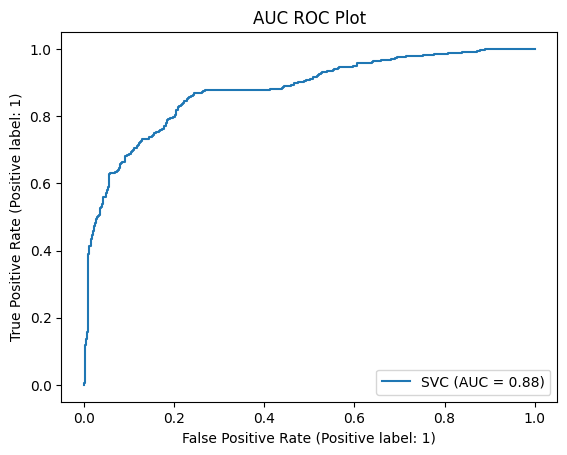

In [102]:
plot_roc_curve(clf, x_test, y_test)
plt.title("AUC ROC Plot")
plt.show()

Final Accuracy is 86% and AUC score is 88%, which is very good.

In [103]:
# Saving the Model

import joblib
joblib.dump(clf, "Rainfall_Prediction_Classifier.pkl")

['Rainfall_Prediction_Classifier.pkl']

### Prediction for Rainfall

In [104]:
data.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,RainToday,RainTomorrow,Day,Month,Year,Avg_WindSpeed,Avg_Humidity,Avg_Cloud,Avg_Temp,Avg_Pressure
0,1,13.4,22.9,0.6,5.389395,7.632205,13,44.0,13,14,0,0,1,12,2008,22.0,46.5,6.251591,19.35,1007.40
1,1,7.4,25.1,0.0,5.389395,7.632205,14,44.0,6,15,0,0,2,12,2008,13.0,34.5,4.534902,20.75,1009.20
2,1,12.9,25.7,0.0,5.389395,7.632205,15,46.0,13,15,0,0,3,12,2008,22.5,34.0,3.283311,22.10,1008.15
3,1,9.2,28.0,0.0,5.389395,7.632205,4,24.0,9,0,0,0,4,12,2008,10.0,30.5,4.534902,22.30,1015.20
4,1,17.5,32.3,1.0,5.389395,7.632205,13,41.0,1,7,0,0,5,12,2008,13.5,57.5,7.500000,23.75,1008.40


In [105]:
x_r = pd.concat([x,y],axis=1)

In [106]:
x_r.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,RainToday,Day,Month,Year,Avg_WindSpeed,Avg_Humidity,Avg_Cloud,Avg_Pressure,RainTomorrow
0,-1.57287,0.041124,-0.077141,0.534236,0.195503,-0.082709,1.160646,0.380260,1.179858,1.349376,-0.556099,-1.893365,1.511409,-3.785861e-13,0.720439,-0.834088,0.820975,-1.461738,0
1,-1.57287,-1.076281,0.280346,-0.698529,0.195503,-0.082709,1.319872,0.380260,-0.140685,1.552244,-0.556099,-1.710758,1.511409,-3.785861e-13,-0.256648,-1.554871,-0.044404,-1.170337,0
2,-1.57287,-0.051713,0.374368,-0.698529,0.195503,-0.082709,1.474872,0.515699,1.179858,1.552244,-0.556099,-1.544131,1.511409,-3.785861e-13,0.769440,-1.584206,-0.641697,-1.340310,0
3,-1.57287,-0.740202,0.722385,-0.698529,0.195503,-0.082709,-0.578373,-1.265782,0.473499,-1.874337,-0.556099,-1.388459,1.511409,-3.785861e-13,-0.639112,-1.787793,-0.044404,-0.199654,0
4,-1.57287,0.800894,1.327005,0.888946,0.195503,-0.082709,1.160646,0.169468,-1.528740,-0.137530,-0.556099,-1.240995,1.511409,-3.785861e-13,-0.196414,-0.149109,1.478348,-1.299837,0


In [107]:
x_r.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'RainToday',
       'Day', 'Month', 'Year', 'Avg_WindSpeed', 'Avg_Humidity', 'Avg_Cloud',
       'Avg_Pressure', 'RainTomorrow'],
      dtype='object')

In [108]:
x_r = x.drop(['Rainfall'], axis=1)
y_r = x['Rainfall']

print(x_r.shape)
print(y_r.shape)

(6255, 17)
(6255,)


In [109]:
from scipy.stats import zscore

print('High Side Outliers present')
print((zscore(x)<3).all())

print('****************************************')

print('Low Side Outliers Present')
print((zscore(x)>-3).all())

High Side Outliers present
Location         True
MinTemp          True
MaxTemp          True
Rainfall         True
Evaporation      True
Sunshine         True
WindGustDir      True
WindGustSpeed    True
WindDir9am       True
WindDir3pm       True
RainToday        True
Day              True
Month            True
Year             True
Avg_WindSpeed    True
Avg_Humidity     True
Avg_Cloud        True
Avg_Pressure     True
dtype: bool
****************************************
Low Side Outliers Present
Location         True
MinTemp          True
MaxTemp          True
Rainfall         True
Evaporation      True
Sunshine         True
WindGustDir      True
WindGustSpeed    True
WindDir9am       True
WindDir3pm       True
RainToday        True
Day              True
Month            True
Year             True
Avg_WindSpeed    True
Avg_Humidity     True
Avg_Cloud        True
Avg_Pressure     True
dtype: bool


In [110]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

xr_scaled = scaler.fit_transform(x_r)

In [111]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif['vif'] = [variance_inflation_factor(xr_scaled, i) for i in range (xr_scaled.shape[1])]

vif['features'] = x_r.columns


# Lets check the values 
vif

,vif,features
0,1.591126,Location
1,3.644337,MinTemp
2,3.968600,MaxTemp
3,1.186778,Evaporation
4,1.637787,Sunshine
5,1.544190,WindGustDir
6,1.927823,WindGustSpeed
7,1.276512,WindDir9am
8,1.440392,WindDir3pm
9,1.322082,RainToday


There is no multicollinearity in the dataset.

In [112]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [113]:
max_r2_score = 0
maxRS = 0
model = [LinearRegression(),
         DecisionTreeRegressor(),
         KNeighborsRegressor(),
         RandomForestRegressor(),
         xgb.XGBRegressor(),
         SVR()]

for rs in range(1,200):
    xr_train, xr_test, yr_train, yr_test = train_test_split(xr_scaled, y_r, test_size = 0.25, random_state = rs)
    for ir in model:
        ir.fit(xr_train, yr_train)
        yr_pred = ir.predict(xr_test)
        r2score = r2_score( yr_test,yr_pred)
        print('r2_score', r2score*100,'%', 'random_state', rs, 'Model', ir)
        if r2score > max_r2_score:
            max_r2_score = r2score
            maxRS = rs
            final_model = ir

            
print("max R2 score corresponds to random state: ", maxRS, 'is', max_r2_score, "and Model is: ", final_model)

r2_score 80.72804564227182 % random_state 1 Model LinearRegression()
r2_score 77.05285450181432 % random_state 1 Model DecisionTreeRegressor()
r2_score 79.28297086285211 % random_state 1 Model KNeighborsRegressor()
r2_score 87.26847041340744 % random_state 1 Model RandomForestRegressor()
r2_score 86.58829154185173 % random_state 1 Model XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=Non

In [114]:
print("max R2 score corresponds to random state: ", maxRS, 'is', max_r2_score, "and Model is: ", final_model)

max R2 score corresponds to random state:  23 is 0.9126360309543377 and Model is:  RandomForestRegressor()


In [115]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(yr_test, yr_pred))
print('MSE:', metrics.mean_squared_error(yr_test, yr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(yr_test, yr_pred)))

MAE: 0.22653383860909912
MSE: 0.16643856673807214
RMSE: 0.4079688305962505


### Parameter Tuning using GridSearchCV

In [116]:
from sklearn.model_selection import GridSearchCV

param_grid = {"max_depth": np.arange(1,100, 10),
              "n_estimators": np.arange(1,200, 10)}

rf = RandomForestRegressor()

grd = GridSearchCV(rf, param_grid = param_grid)
grd.fit(xr_train, yr_train)

print('Best Param ==>', grd.best_params_)

rf = grd.best_estimator_

rf.fit(xr_train, yr_train)
yr_pred = rf.predict(xr_test)


print('R2 Score: ', rf.score(xr_test, yr_test))

print('Mean Squared Error: ', mean_squared_error(yr_test, yr_pred))

Best Param ==> {'max_depth': 31, 'n_estimators': 121}
R2 Score:  0.8874898370490008
Mean Squared Error:  0.1065862356336021


<Axes: xlabel='Rainfall', ylabel='Density'>

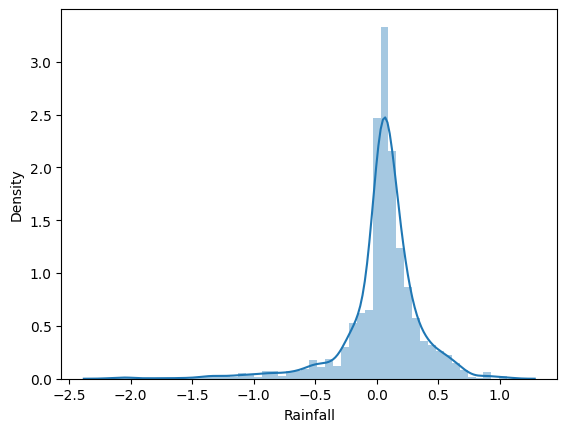

In [117]:
#checking distribution on the test dataset
sns.distplot(rf.predict(xr_test) - yr_test)

we are getting a normal distribution curve which means that our model Random Forest Regressor is performing correctly.

In [118]:
# Saving the Model

import joblib
joblib.dump(rf, "Rainfall_Prediction_Regression.pkl")

['Rainfall_Prediction_Regression.pkl']